<a href="https://colab.research.google.com/github/saish23/Deep-Learning-Projects-/blob/main/News_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d amananandrai/ag-news-classification-dataset

 88% 10.0M/11.4M [00:00<00:00, 16.8MB/s]
100% 11.4M/11.4M [00:00<00:00, 13.5MB/s]


In [4]:
import zipfile

zip_ref = zipfile.ZipFile('/content/ag-news-classification-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('punkt')

import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored

#Train Test Split
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

# Read the CSV file
data = pd.read_csv('/content/train.csv')

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [6]:
data['Title'][0]

'Wall St. Bears Claw Back Into the Black (Reuters)'

In [7]:
data['Description'][0]

"Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [8]:
# Check the dimensions of the dataset
print("Dataset dimensions:")
data.shape

Dataset dimensions:


(120000, 3)

In [9]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Class Index    0
Title          0
Description    0
dtype: int64


In [10]:
# Get basic statistics about the dataset
print("Dataset statistics:\n", data.describe())

Dataset statistics:
          Class Index
count  120000.000000
mean        2.500000
std         1.118039
min         1.000000
25%         1.750000
50%         2.500000
75%         3.250000
max         4.000000


In [12]:
data['Class Index'].nunique()

4

In [11]:
data['Class Index'].unique()

array([3, 4, 2, 1])

In [13]:
data['Class Index'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: Class Index, dtype: int64

Average number of tokens per article: 8.049258333333333


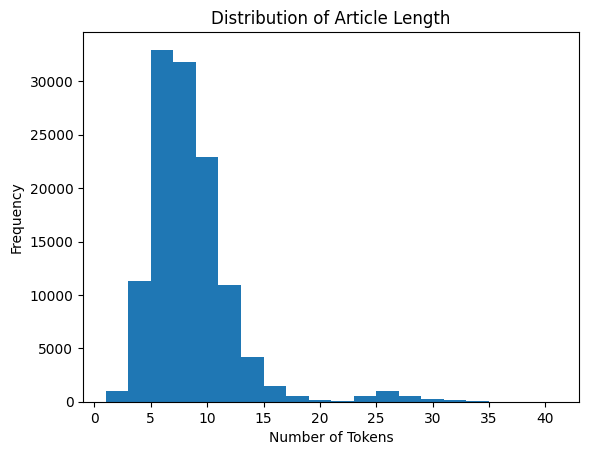

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Average number of filtered tokens per article: 6.781875


In [14]:
# Tokenize the text
data['tokens_Title'] = data['Title'].apply(lambda x: word_tokenize(x.lower()))

# Count the number of tokens in each article
data['num_tokens_Title'] = data['tokens_Title'].apply(lambda x: len(x))

# Calculate the average number of tokens
avg_tokens_t = data['num_tokens_Title'].mean()
print("Average number of tokens per article:", avg_tokens_t)

# Plot a histogram of the number of tokens
plt.hist(data['num_tokens_Title'], bins=20)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Article Length')
plt.show()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['filtered_tokens_t'] = data['tokens_Title'].apply(lambda x: [word for word in x if word not in stop_words])

# Calculate the average number of filtered tokens
avg_filtered_tokens_t = data['filtered_tokens_t'].apply(lambda x: len(x)).mean()
print("Average number of filtered tokens per article:", avg_filtered_tokens_t)

In [15]:
data.head()

,Class Index,Title,Description,tokens_Title,num_tokens_Title,filtered_tokens_t
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","[wall, st., bears, claw, back, into, the, blac...",11,"[wall, st., bears, claw, back, black, (, reute..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"[carlyle, looks, toward, commercial, aerospace...",8,"[carlyle, looks, toward, commercial, aerospace..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"[oil, and, economy, cloud, stocks, ', outlook,...",10,"[oil, economy, cloud, stocks, ', outlook, (, r..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"[iraq, halts, oil, exports, from, main, southe...",11,"[iraq, halts, oil, exports, main, southern, pi..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","[oil, prices, soar, to, all-time, record, ,, p...",16,"[oil, prices, soar, all-time, record, ,, posin..."


Average number of tokens per article: 35.8779


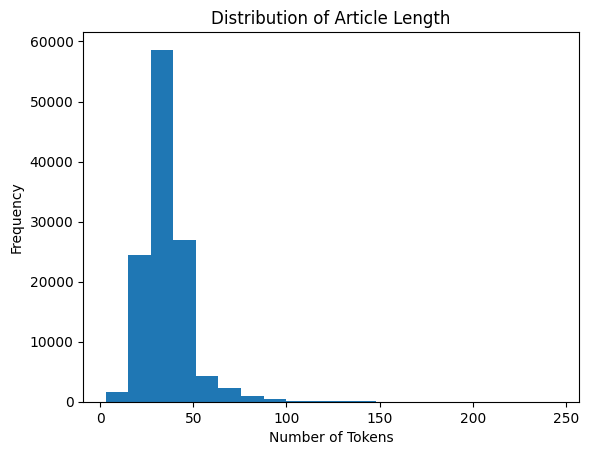

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average number of filtered tokens per article: 25.161333333333335


In [16]:
# Tokenize the text
data['tokens_Description'] = data['Description'].apply(lambda x: word_tokenize(x.lower()))

# Count the number of tokens in each article
data['num_tokens_tokens_Description'] = data['tokens_Description'].apply(lambda x: len(x))

# Calculate the average number of tokens
avg_tokens = data['num_tokens_tokens_Description'].mean()
print("Average number of tokens per article:", avg_tokens)

# Plot a histogram of the number of tokens
plt.hist(data['num_tokens_tokens_Description'], bins=20)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Article Length')
plt.show()

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['filtered_tokens_Description'] = data['tokens_Description'].apply(lambda x: [word for word in x if word not in stop_words])

# Calculate the average number of filtered tokens
avg_filtered_tokens_Description = data['filtered_tokens_Description'].apply(lambda x: len(x)).mean()
print("Average number of filtered tokens per article:", avg_filtered_tokens_Description)

In [35]:
data.head()

,Class Index,Title,Description,tokens_Title,num_tokens_Title,filtered_tokens_t,tokens_Description,num_tokens_tokens_Description,filtered_tokens_Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","[wall, st., bears, claw, back, into, the, blac...",11,"[wall, st., bears, claw, back, black, (, reute...","[reuters, -, short-sellers, ,, wall, street, '...",16,"[reuters, -, short-sellers, ,, wall, street, '..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"[carlyle, looks, toward, commercial, aerospace...",8,"[carlyle, looks, toward, commercial, aerospace...","[reuters, -, private, investment, firm, carlyl...",34,"[reuters, -, private, investment, firm, carlyl..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"[oil, and, economy, cloud, stocks, ', outlook,...",10,"[oil, economy, cloud, stocks, ', outlook, (, r...","[reuters, -, soaring, crude, prices, plus, wor...",30,"[reuters, -, soaring, crude, prices, plus, wor..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"[iraq, halts, oil, exports, from, main, southe...",11,"[iraq, halts, oil, exports, main, southern, pi...","[reuters, -, authorities, have, halted, oil, e...",29,"[reuters, -, authorities, halted, oil, export\..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","[oil, prices, soar, to, all-time, record, ,, p...",16,"[oil, prices, soar, all-time, record, ,, posin...","[afp, -, tearaway, world, oil, prices, ,, topp...",27,"[afp, -, tearaway, world, oil, prices, ,, topp..."


In [18]:
TEST_FILE_PATH = '/content/test.csv'

#Load Data
testdata = pd.read_csv(TEST_FILE_PATH)

testdata.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [20]:
#Combine Title and Description
X_train = data['Title'] + " " + data['Description'] # Combine title and description (better accuracy than using them as separate features)
y_train = data['Class Index'].apply(lambda x: x-1).values # Class labels need to begin from 0

x_test = testdata['Title'] + " " + testdata['Description'] # Combine title and description (better accuracy than using them as separate features)
y_test = testdata['Class Index'].apply(lambda x: x-1).values # Class labels need to begin from 0

#Max Length of sentences in Train Dataset
maxlen = X_train.map(lambda x: len(x.split())).max()
data.head()

,Class Index,Title,Description,tokens_Title,num_tokens_Title,filtered_tokens_t,tokens_Description,num_tokens_tokens_Description,filtered_tokens_Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...","[wall, st., bears, claw, back, into, the, blac...",11,"[wall, st., bears, claw, back, black, (, reute...","[reuters, -, short-sellers, ,, wall, street, '...",16,"[reuters, -, short-sellers, ,, wall, street, '..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,"[carlyle, looks, toward, commercial, aerospace...",8,"[carlyle, looks, toward, commercial, aerospace...","[reuters, -, private, investment, firm, carlyl...",34,"[reuters, -, private, investment, firm, carlyl..."
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,"[oil, and, economy, cloud, stocks, ', outlook,...",10,"[oil, economy, cloud, stocks, ', outlook, (, r...","[reuters, -, soaring, crude, prices, plus, wor...",30,"[reuters, -, soaring, crude, prices, plus, wor..."
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,"[iraq, halts, oil, exports, from, main, southe...",11,"[iraq, halts, oil, exports, main, southern, pi...","[reuters, -, authorities, have, halted, oil, e...",29,"[reuters, -, authorities, halted, oil, export\..."
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","[oil, prices, soar, to, all-time, record, ,, p...",16,"[oil, prices, soar, all-time, record, ,, posin...","[afp, -, tearaway, world, oil, prices, ,, topp...",27,"[afp, -, tearaway, world, oil, prices, ,, topp..."


In [21]:
testdata.shape

(7600, 3)

In [22]:
vocab_size = 10000 # arbitrarily chosen
embed_size = 32 # arbitrarily chosen

# Create and Fit tokenizer
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(X_train.values)

# Tokenize data
X_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(x_test)

# Pad data
X_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [23]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D()) #Pooling Layer decreases sensitivity to features, thereby creating more generalised data for better test results.
model.add(Dense(1024))
model.add(Dropout(0.25)) #Dropout layer nullifies certain random input values to generate a more general dataset and prevent the problem of overfitting.
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax')) #softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 177, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 177, 256)         164864    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 177, 128)         164352    
 nal)                                                            
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                        

In [24]:
callbacks = [
    EarlyStopping(     #EarlyStopping is used to stop at the epoch where val_accuracy does not improve significantly
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=4,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )
]

In [25]:
#Compile and Fit Model

model.compile(loss='sparse_categorical_crossentropy', #Sparse Categorical Crossentropy Loss because data is not one-hot encoded
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train,
          y_train,
          batch_size=256,
          validation_data=(x_test, y_test),
          epochs=20,
          callbacks=callbacks)


Epoch 1/20
469/469 [==============================] - ETA: 0s - loss: 0.3961 - accuracy: 0.8569
Epoch 1: val_accuracy improved from -inf to 0.90987, saving model to weights.h5
469/469 [==============================] - 83s 140ms/step - loss: 0.3961 - accuracy: 0.8569 - val_loss: 0.2767 - val_accuracy: 0.9099
Epoch 2/20
469/469 [==============================] - ETA: 0s - loss: 0.2361 - accuracy: 0.9234
Epoch 2: val_accuracy improved from 0.90987 to 0.91342, saving model to weights.h5
469/469 [==============================] - 38s 82ms/step - loss: 0.2361 - accuracy: 0.9234 - val_loss: 0.2588 - val_accuracy: 0.9134
Epoch 3/20
469/469 [==============================] - ETA: 0s - loss: 0.1999 - accuracy: 0.9335
Epoch 3: val_accuracy did not improve from 0.91342
469/469 [==============================] - 36s 78ms/step - loss: 0.1999 - accuracy: 0.9335 - val_loss: 0.2668 - val_accuracy: 0.9105
Epoch 4/20
469/469 [==============================] - ETA: 0s - loss: 0.1686 - accuracy: 0.9424
Ep

In [26]:
model.save('lstm_model.h5')

In [27]:
model.load_weights('weights.h5')

In [28]:
def modelDemo(news_text):

  #News Labels
  labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']

  test_seq = pad_sequences(tok.texts_to_sequences(news_text), maxlen=maxlen)

  test_preds = [labels[np.argmax(i)] for i in model.predict(test_seq)]

  for news, label in zip(news_text, test_preds):
      # print('{} - {}'.format(news, label))
      print('{} - {}'.format(colored(news, 'yellow'), colored(label, 'blue')))

In [29]:
modelDemo(['New evidence of virus risks from wildlife trade'])

1/1 [==============================] - 1s 1s/step
New evidence of virus risks from wildlife trade - Science-Technology News


In [30]:
modelDemo(['Coronavirus: Bank pumps £100bn into UK economy to aid recovery'])


1/1 [==============================] - 0s 30ms/step
Coronavirus: Bank pumps £100bn into UK economy to aid recovery - Business News


238/238 [==============================] - 6s 25ms/step


<Figure size 640x480 with 0 Axes>

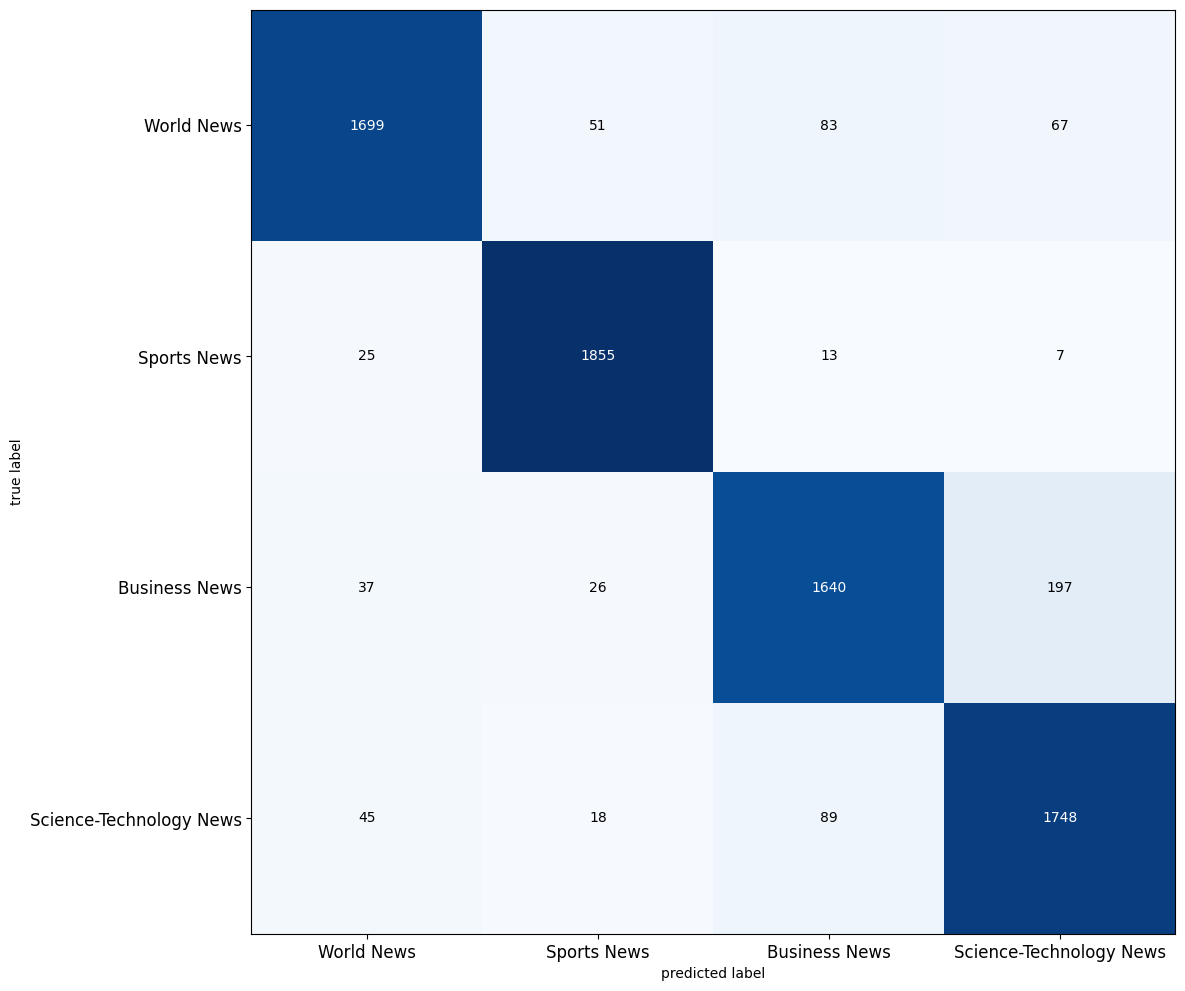

In [31]:
# Model Evaluation:

labels = ['World News', 'Sports News', 'Business News', 'Science-Technology News']
preds = [np.argmax(i) for i in model.predict(x_test)]
cm  = confusion_matrix(y_test, preds)
plt.figure()
plot_confusion_matrix(cm, figsize=(16,12), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(4), labels, fontsize=12)
plt.yticks(range(4), labels, fontsize=12)
plt.show()

In [32]:
print("Recall of the model is {:.2f}".format(recall_score(y_test, preds, average='micro')))
print("Precision of the model is {:.2f}".format(precision_score(y_test, preds, average='micro')))
print("Accuracy of the model is {:.2f}".format(accuracy_score(y_test, preds)))

Recall of the model is 0.91
Precision of the model is 0.91
Accuracy of the model is 0.91
